                                                     ASSIGNMENT-01(Basic Stat)
                                                    
    

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Load the dataset
df = pd.read_csv("sales_data_with_discounts.csv")  


In [5]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()


In [6]:
# Descriptive Analytics
stats_summary = df[num_cols].describe().T
stats_summary["mode"] = df[num_cols].mode().iloc[0]
print("Descriptive Statistics for Numerical Columns:\n", stats_summary)

Descriptive Statistics for Numerical Columns:
                    count          mean           std         min          25%  \
Volume             450.0      5.066667      4.231602    1.000000     3.000000   
Avg Price          450.0  10453.433333  18079.904840  290.000000   465.000000   
Total Sales Value  450.0  33812.835556  50535.074173  400.000000  2700.000000   
Discount Rate (%)  450.0     15.155242      4.220602    5.007822    13.965063   
Discount Amount    450.0   3346.499424   4509.902963   69.177942   460.459304   
Net Sales Value    450.0  30466.336131  46358.656624  326.974801  2202.208645   

                           50%           75%            max          mode  
Volume                4.000000      6.000000      31.000000      3.000000  
Avg Price          1450.000000  10100.000000   60100.000000    400.000000  
Total Sales Value  5700.000000  53200.000000  196400.000000  24300.000000  
Discount Rate (%)    16.577766     18.114718      19.992407      5.007822  
Disco

<Figure size 500x200 with 0 Axes>

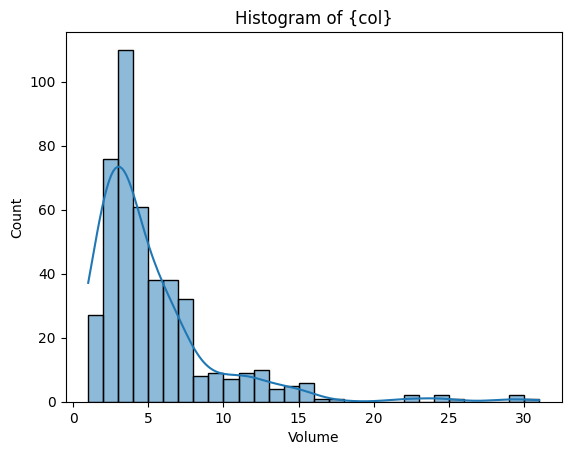

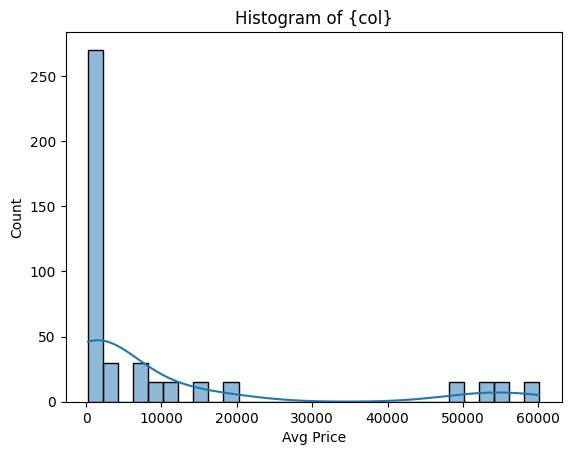

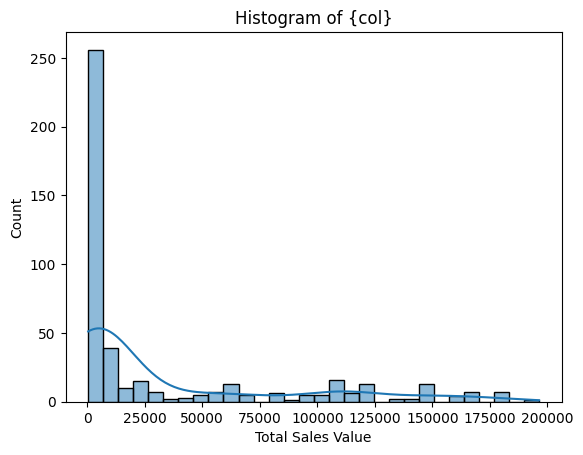

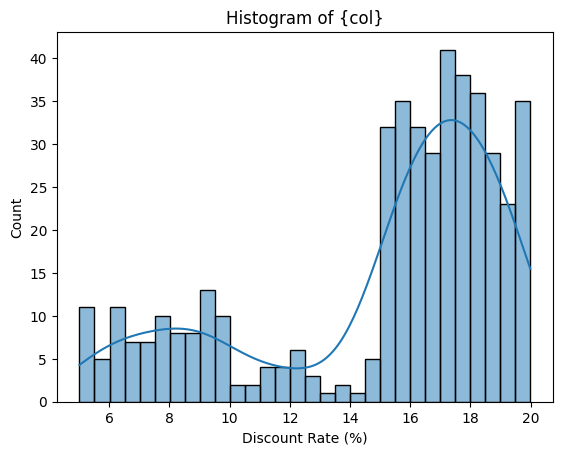

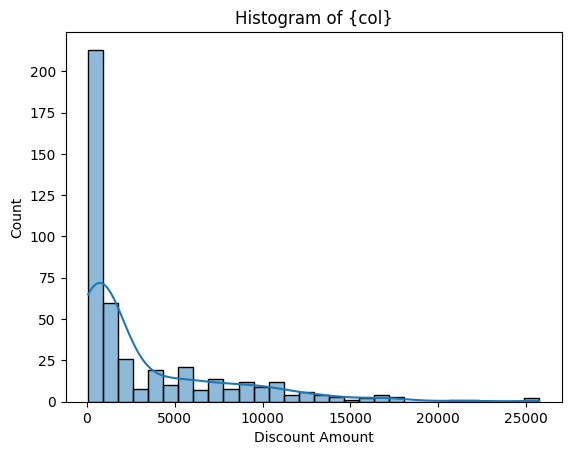

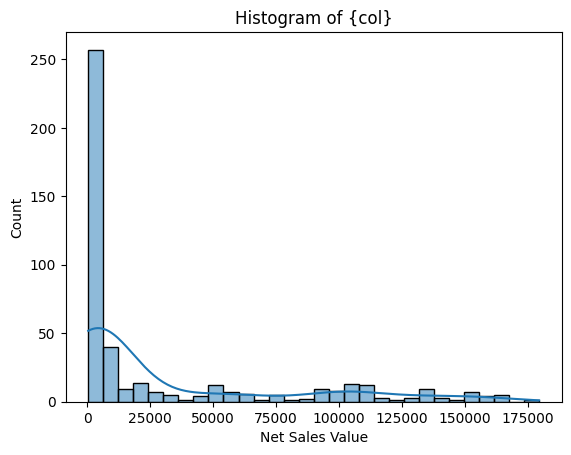

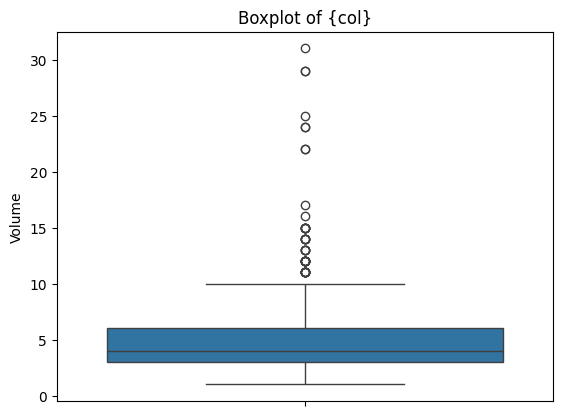

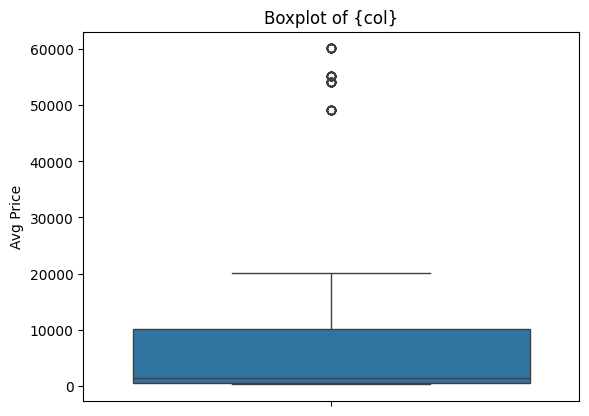

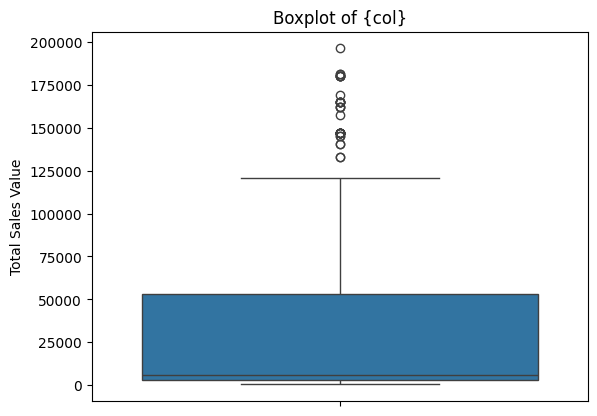

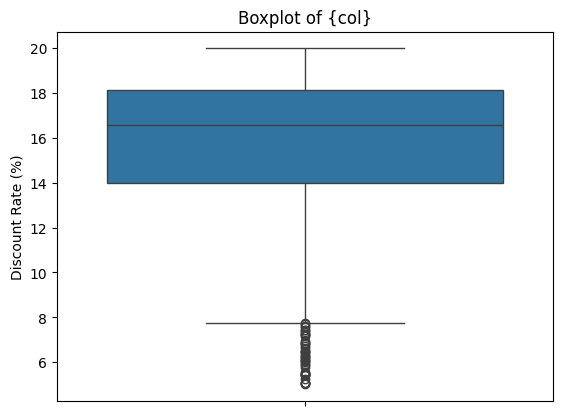

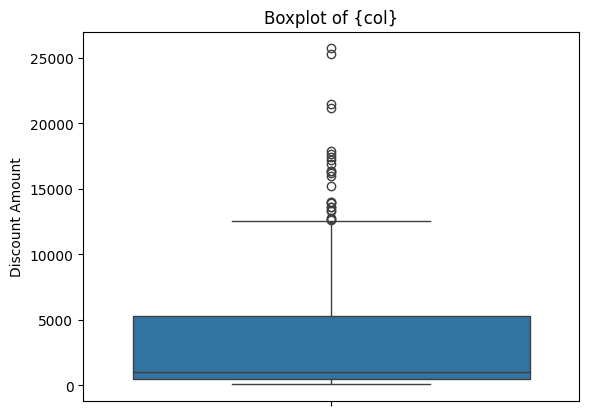

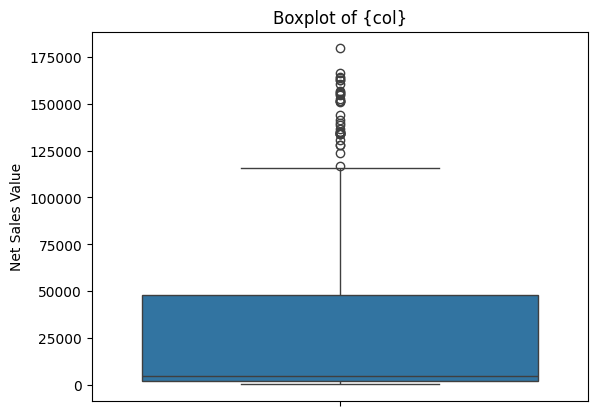

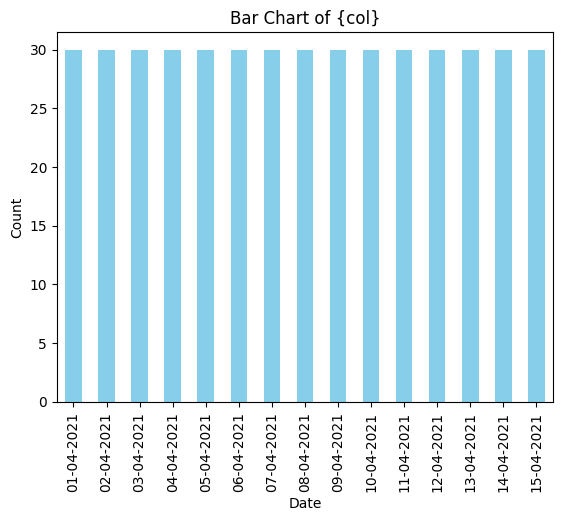

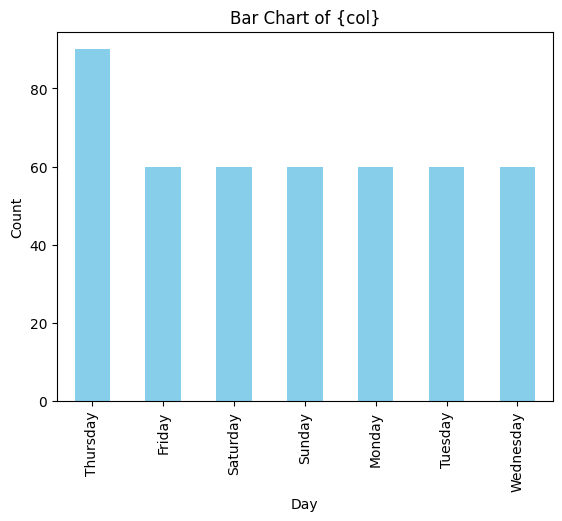

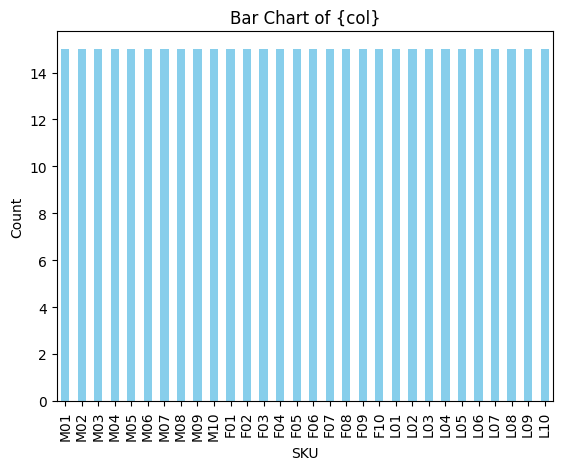

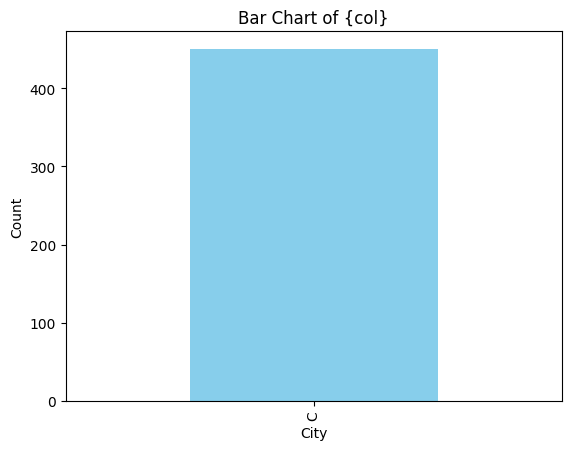

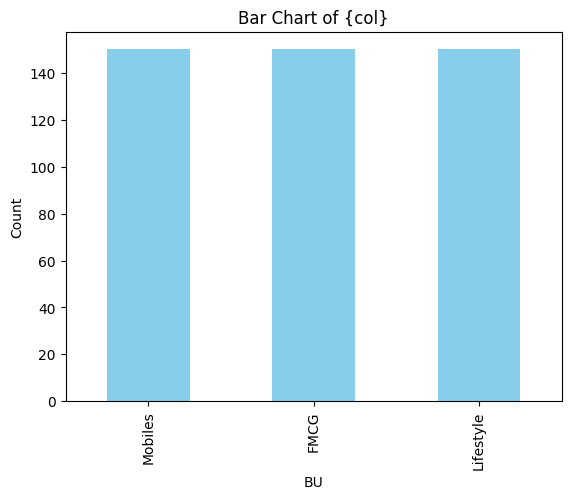

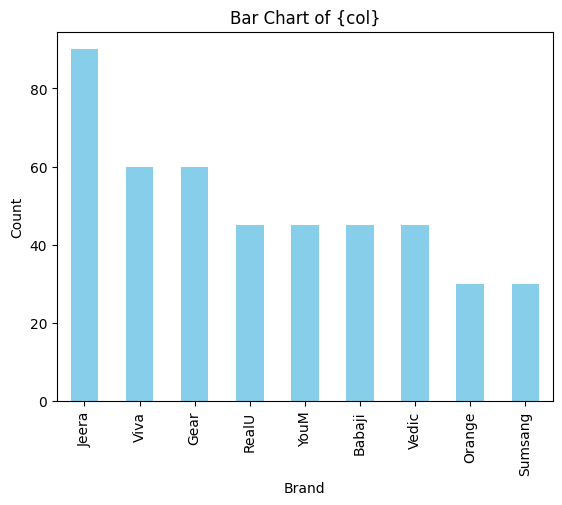

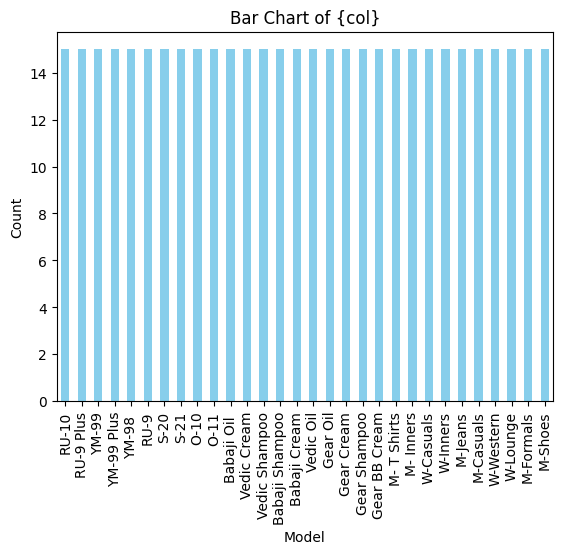

In [7]:
# Data Visualization
plt.figure(figsize=(5, 2))
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title("Histogram of {col}")
    plt.show()

for col in num_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title("Boxplot of {col}")
    plt.show()

for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [11]:
# Standardization (Z-score normalization)
df_standardized = df.copy()
df_standardized[num_cols] = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()
print("Standardized Data Sample:\n", df_standardized[num_cols].head())

# One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("One-Hot Encoded Data Sample:\n", df_encoded.head())


Standardized Data Sample:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  
One-Hot Encoded Data Sample:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6     